Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/Python2024_0427/Marketing_data.csv')

# CUSTID: Identification of Credit Card holder
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
creditcard_df.info()
# 18 features with 8950 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe() #기초통계량내주는함수
# Mean balance is $1564
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# who made one off purchase of $40761 ?
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


#  VISUALIZE AND EXPLORE DATASET

<Axes: >

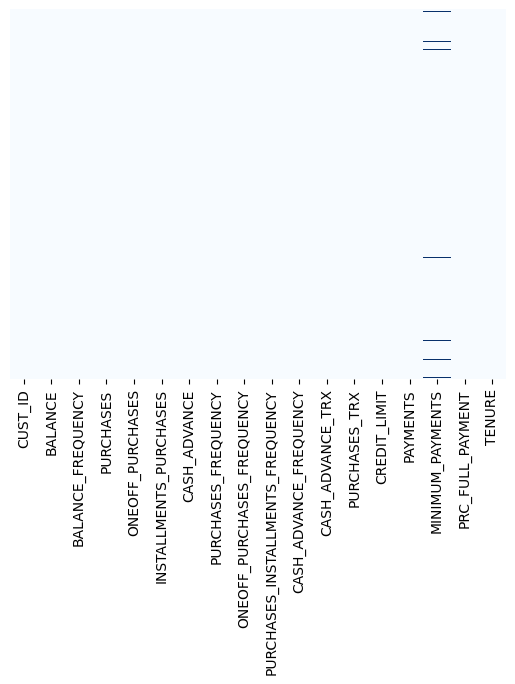

In [ ]:
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
creditcard_df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [ ]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

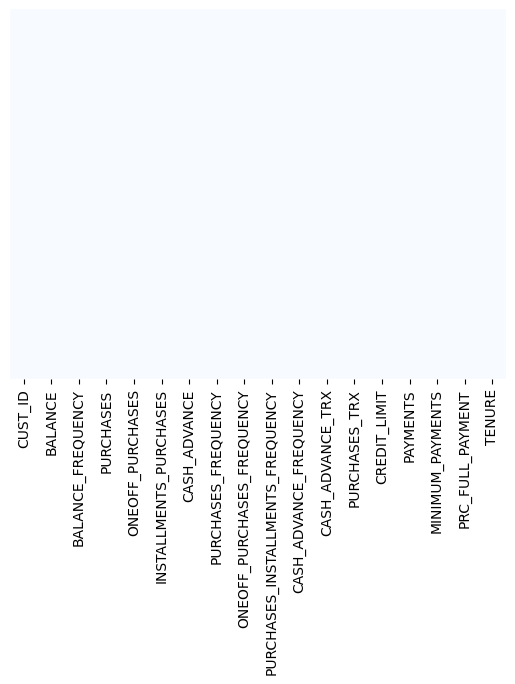

In [ ]:
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

np.int64(0)

In [ ]:
# Let's drop Customer ID since it has no meaning here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
n = len(creditcard_df.columns)
n

17

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

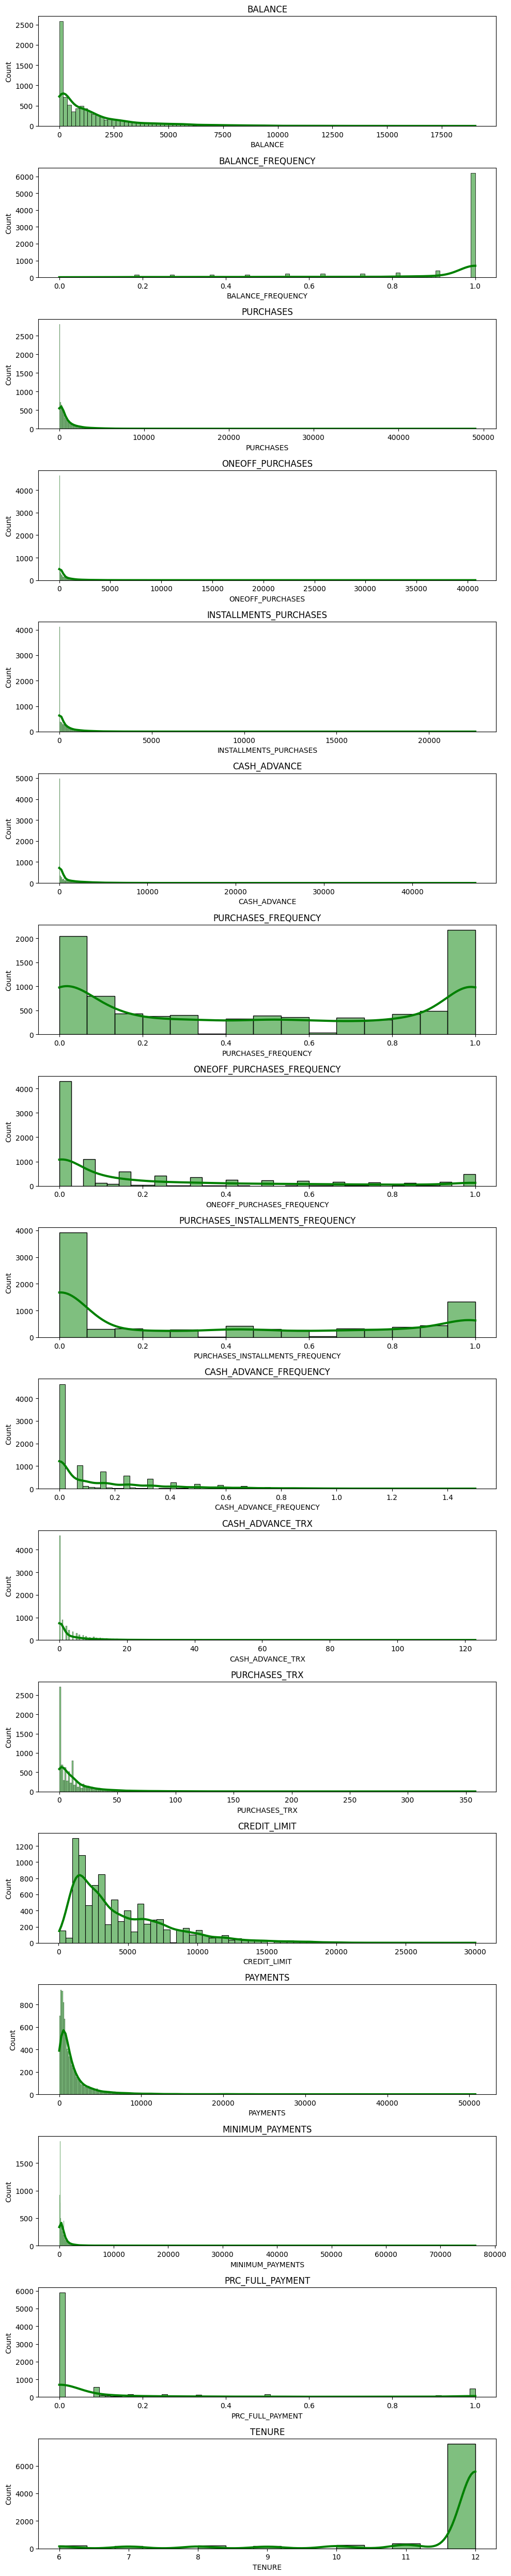

In [ ]:
plt.figure(figsize=(10,50))

for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(data=creditcard_df, x=creditcard_df.columns[i], kde=True,
               line_kws={"color": "b", "lw": 3, "label": "KDE"},
               color="g")
  plt.title(creditcard_df.columns[i])

plt.tight_layout()
plt.show()

In [ ]:

## Correlation Plot?
correlations = creditcard_df.corr()


<Axes: >

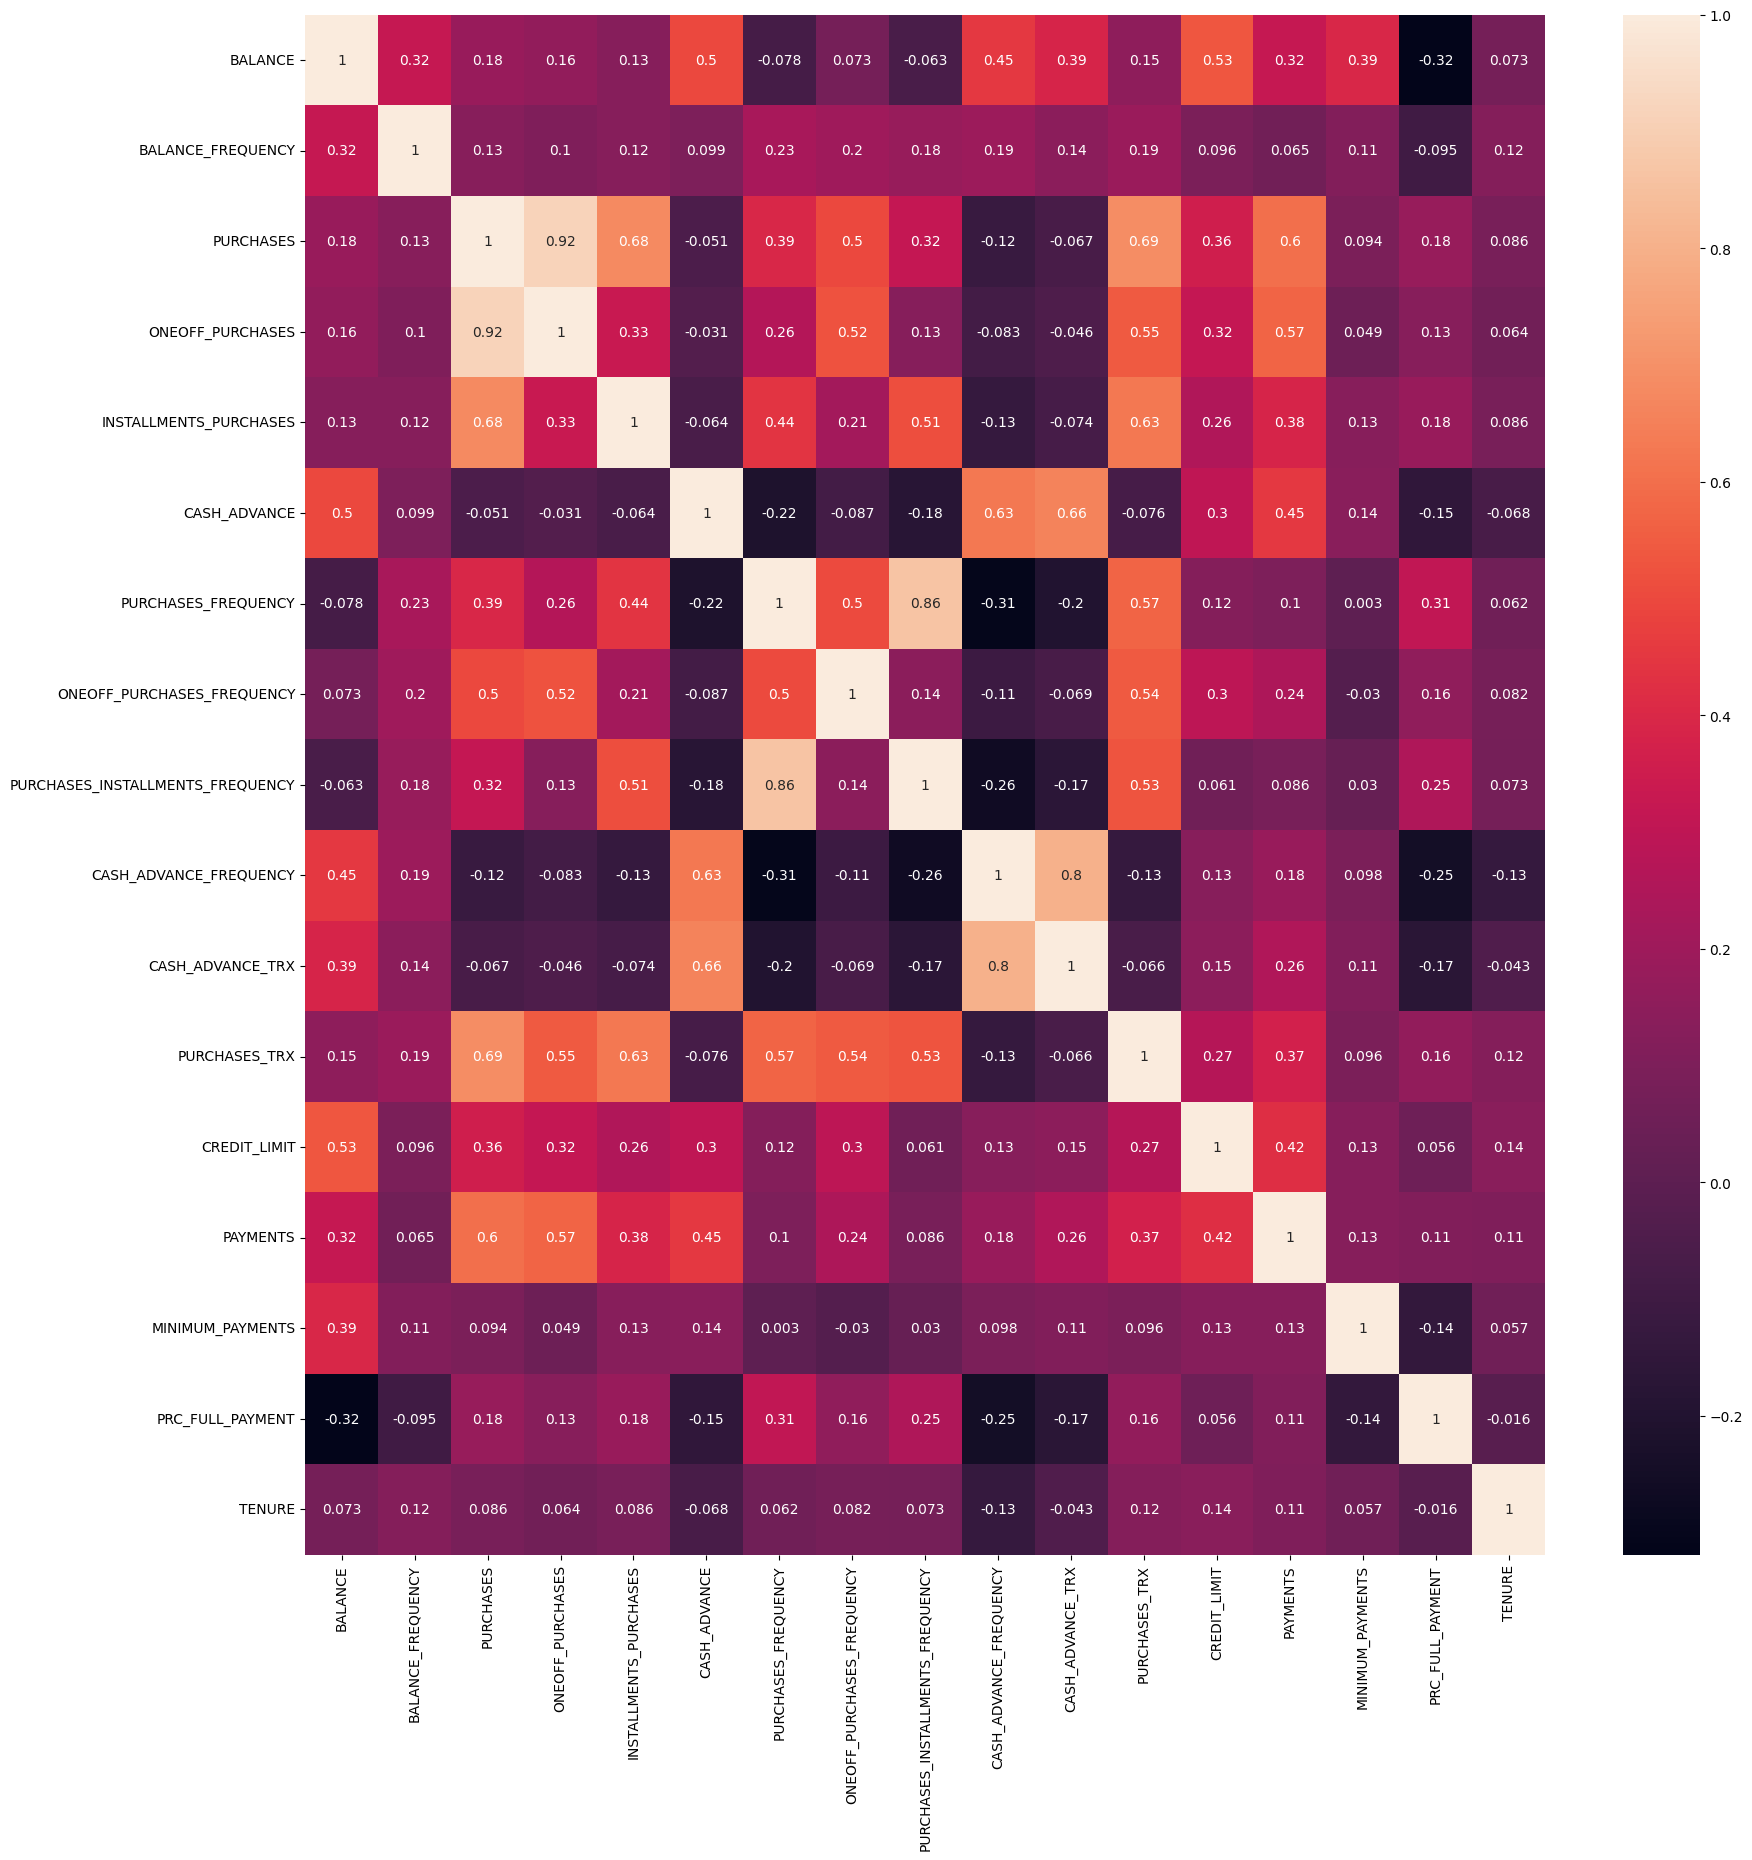

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


#  K-MEANS Clustering

1. Chooose number of cluster K (Elbow Method)
2. Random K points to be centroids
3. Assign data points to the nearest centroid.
4. Calculate a new centroid for each cluster
5. Reassign
6. Repeat 4~5

# ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

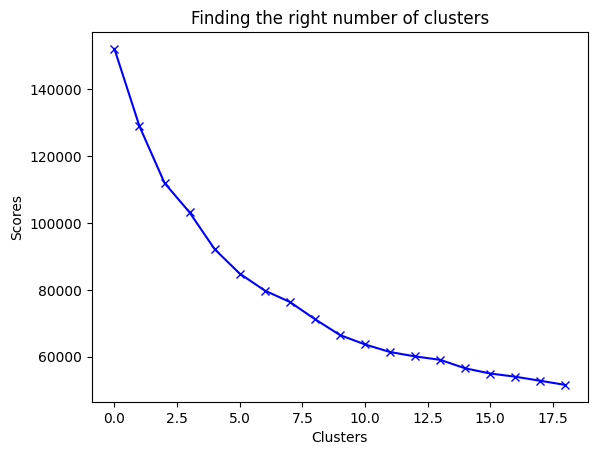

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    # n_init 매개변수를 'auto'로 설정
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7.

# APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(n_clusters=8, n_init='auto')
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.415721,0.413915,-0.297582,-0.217376,-0.304322,1.164649,-0.623208,-0.312934,-0.544800,1.502167,1.183660,-0.371678,0.751185,0.222216,0.572310,-0.451516,0.114645
1,0.272339,0.442142,1.328815,1.191994,0.951939,-0.277181,1.128858,1.867997,0.728504,-0.377379,-0.290886,1.590069,0.919888,0.650343,0.033580,0.520618,0.307753
2,-0.347081,-0.343349,-0.283329,-0.209086,-0.285438,0.050994,-0.177555,-0.267211,-0.213290,0.280761,-0.015695,-0.380069,-0.559888,-0.390201,-0.210900,0.022104,-3.198235
3,1.918909,0.324834,11.644370,11.081956,7.170615,-0.028495,1.031065,1.901268,0.937200,-0.496876,-0.251033,5.169903,3.045438,8.080930,1.179848,1.155737,0.307305
4,1.758969,0.322674,0.149101,0.104990,0.159235,4.227982,-0.107048,0.107980,-0.053813,2.542386,3.858530,0.190171,1.334763,3.014061,0.570567,-0.169479,0.038593
5,-0.701999,-2.144904,-0.305100,-0.227678,-0.303003,-0.322315,-0.545438,-0.421966,-0.443734,-0.520753,-0.377263,-0.414805,-0.167000,-0.200487,-0.257051,0.300966,0.200737
6,-0.108848,0.395883,-0.323566,-0.201637,-0.394503,-0.197429,-0.712697,-0.224635,-0.738118,-0.053736,-0.137365,-0.436447,-0.370668,-0.273109,-0.079086,-0.440208,0.279597
7,-0.386679,0.334405,-0.024727,-0.205341,0.318613,-0.376715,1.001915,-0.223909,1.148874,-0.491010,-0.371877,0.196383,-0.263666,-0.221595,-0.060451,0.347439,0.261213


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4511.177712,0.975323,367.415701,231.638100,135.873246,3421.194597,0.240227,0.109103,0.147920,0.435743,11.326435,5.471308,7227.567776,2376.437690,2197.951899,0.021654,11.670743
1,2131.325029,0.982010,3842.238248,2570.903318,1271.894110,397.610634,0.943416,0.759717,0.653964,0.059627,1.263747,54.232992,7841.379310,3615.823966,942.463913,0.305986,11.929171
2,842.054272,0.795934,397.868981,245.396783,152.949904,1085.807425,0.419089,0.122744,0.279670,0.191327,3.141720,5.262739,2457.347849,603.550287,372.713246,0.160180,7.237261
3,5558.520909,0.954221,25881.580714,18986.215000,6895.365714,919.116626,0.904167,0.769643,0.736905,0.035714,1.535714,143.214286,15575.000000,25126.644865,3613.792313,0.491748,11.928571
4,5225.619853,0.953709,1321.761609,766.699885,555.061724,9845.146075,0.447387,0.234670,0.343051,0.643902,29.580460,19.436782,9350.862069,10458.555970,2193.889272,0.104145,11.568966
5,103.322505,0.369163,351.354146,214.539154,137.066091,302.961450,0.271440,0.076577,0.188086,0.030936,0.674281,4.399323,3886.835401,1152.752626,265.159445,0.241742,11.785956
6,1337.916166,0.971052,311.900598,257.760959,54.323541,564.854317,0.204311,0.135445,0.071091,0.124391,2.311408,3.861390,3145.807011,942.518651,679.899740,0.024961,11.891490
7,759.635205,0.956488,950.374761,251.612937,699.184979,188.881687,0.892467,0.135661,0.821029,0.036888,0.711037,19.591189,3535.124337,1091.648236,723.328473,0.255335,11.866888


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

np.int32(7)

In [ ]:
labels.min()

np.int32(0)

In [ ]:
kmeans = KMeans(n_clusters=7, n_init='auto', random_state=0)

y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 4, 5, ..., 3, 2, 1], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


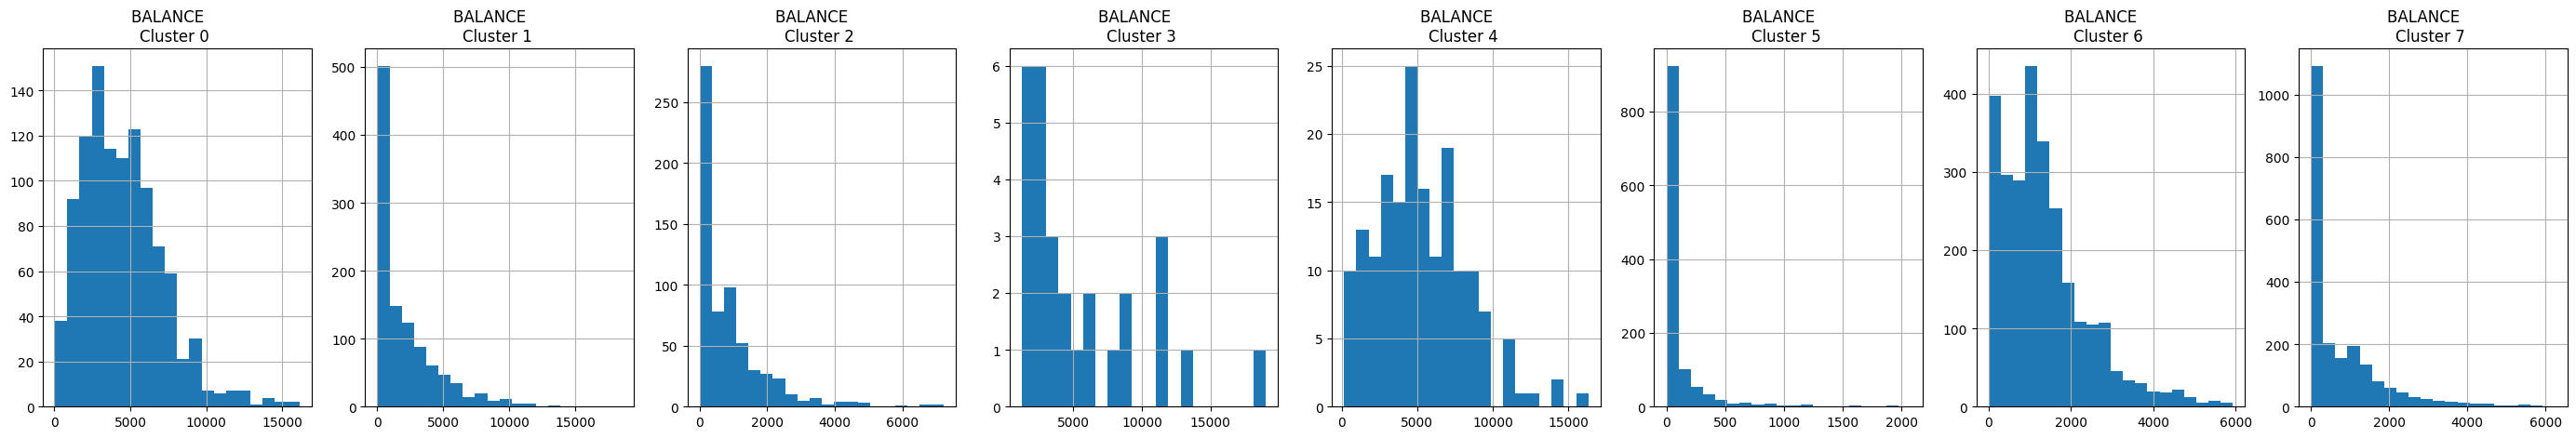

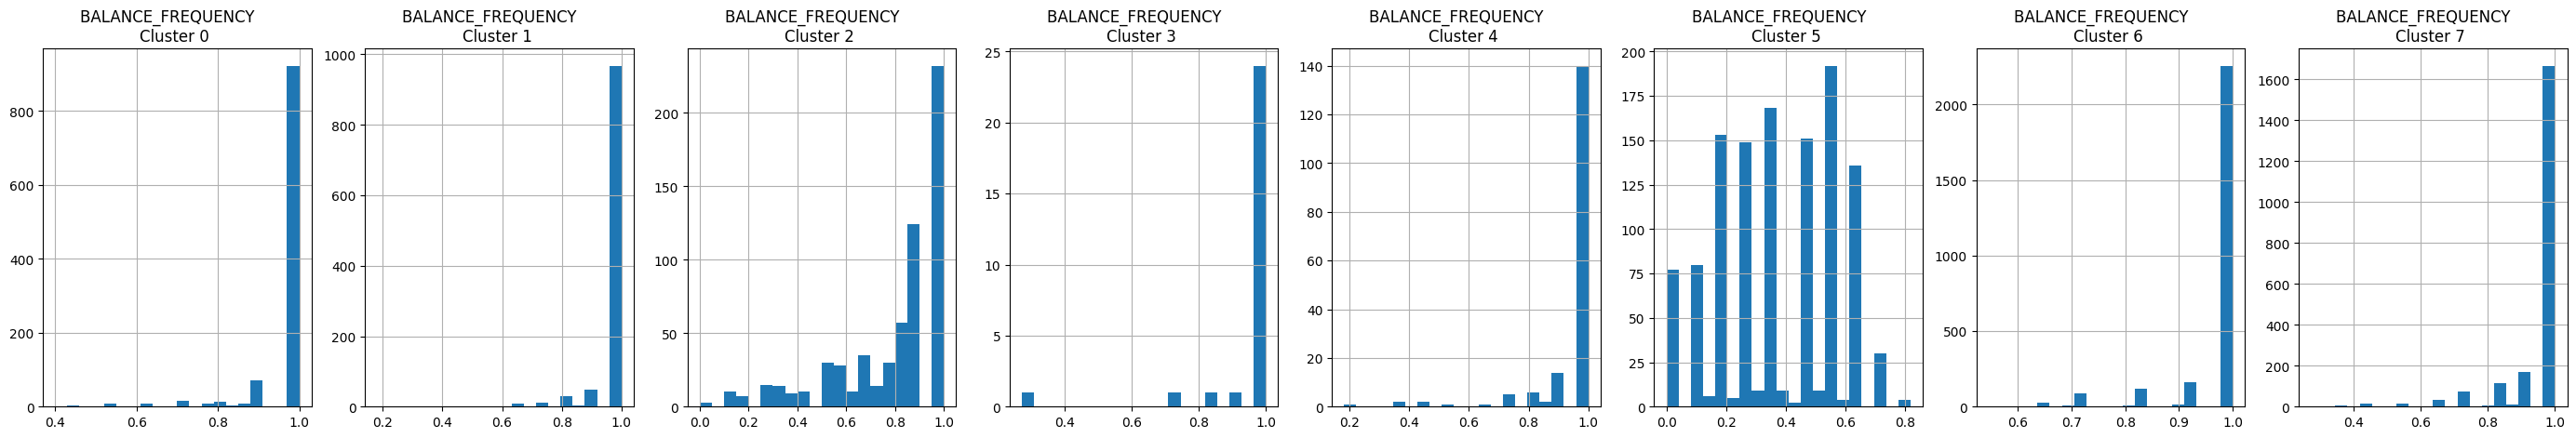

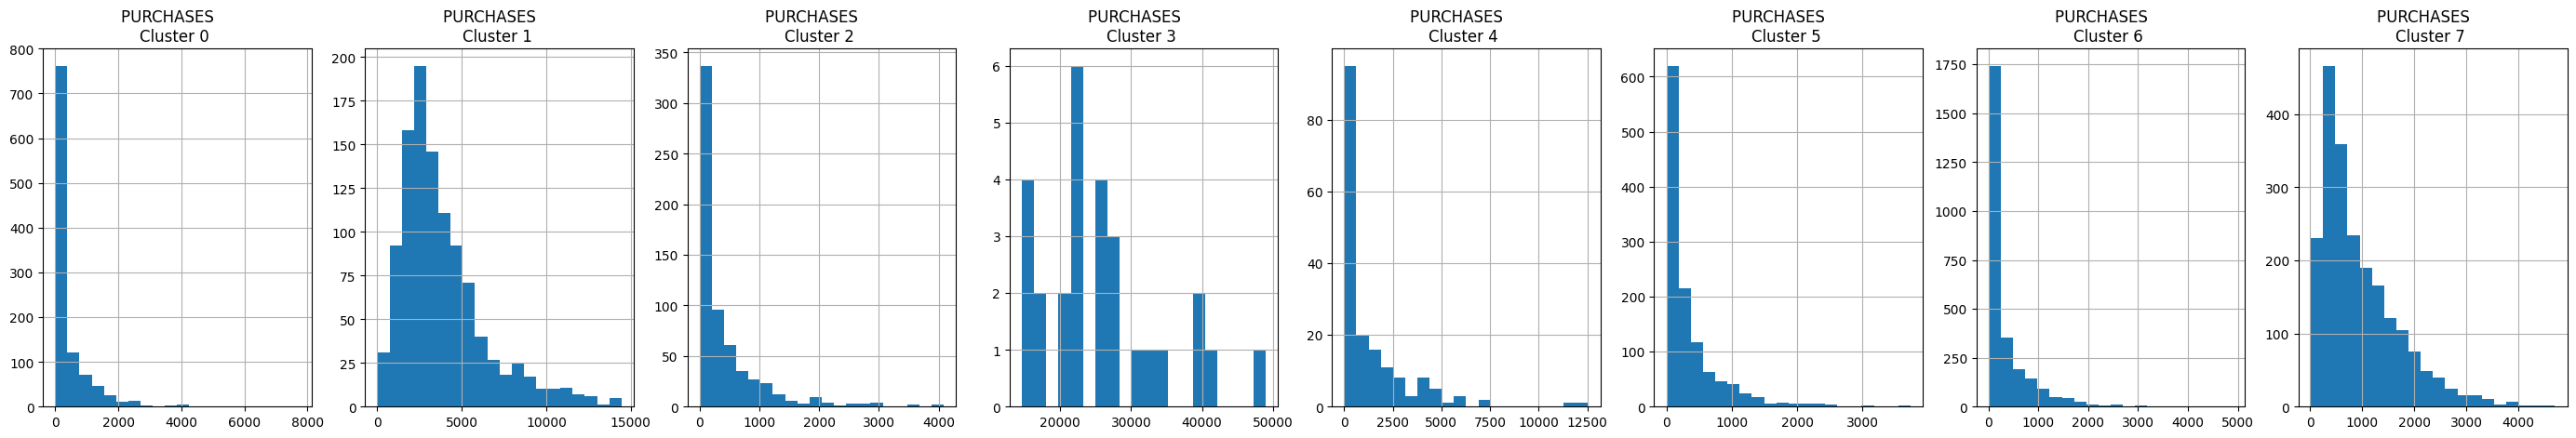

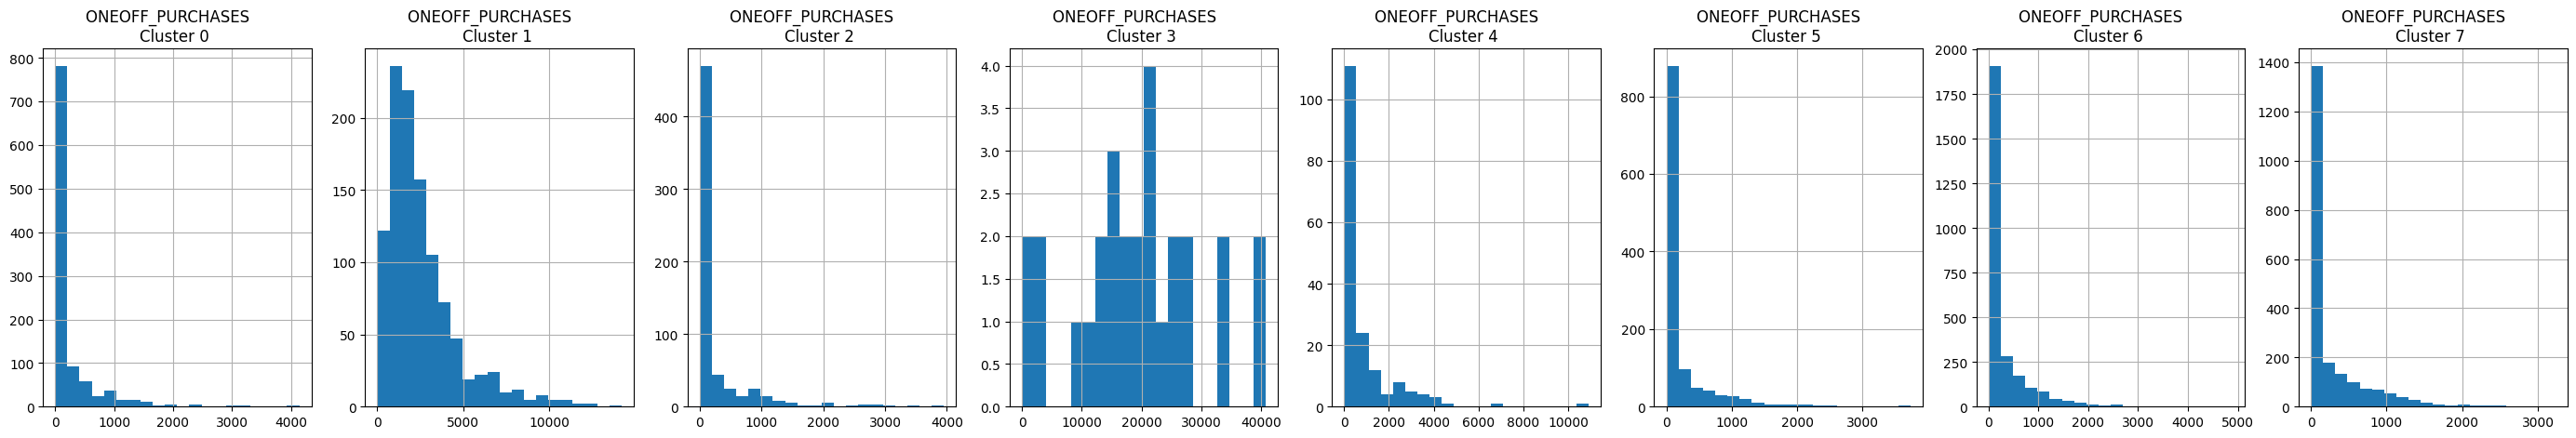

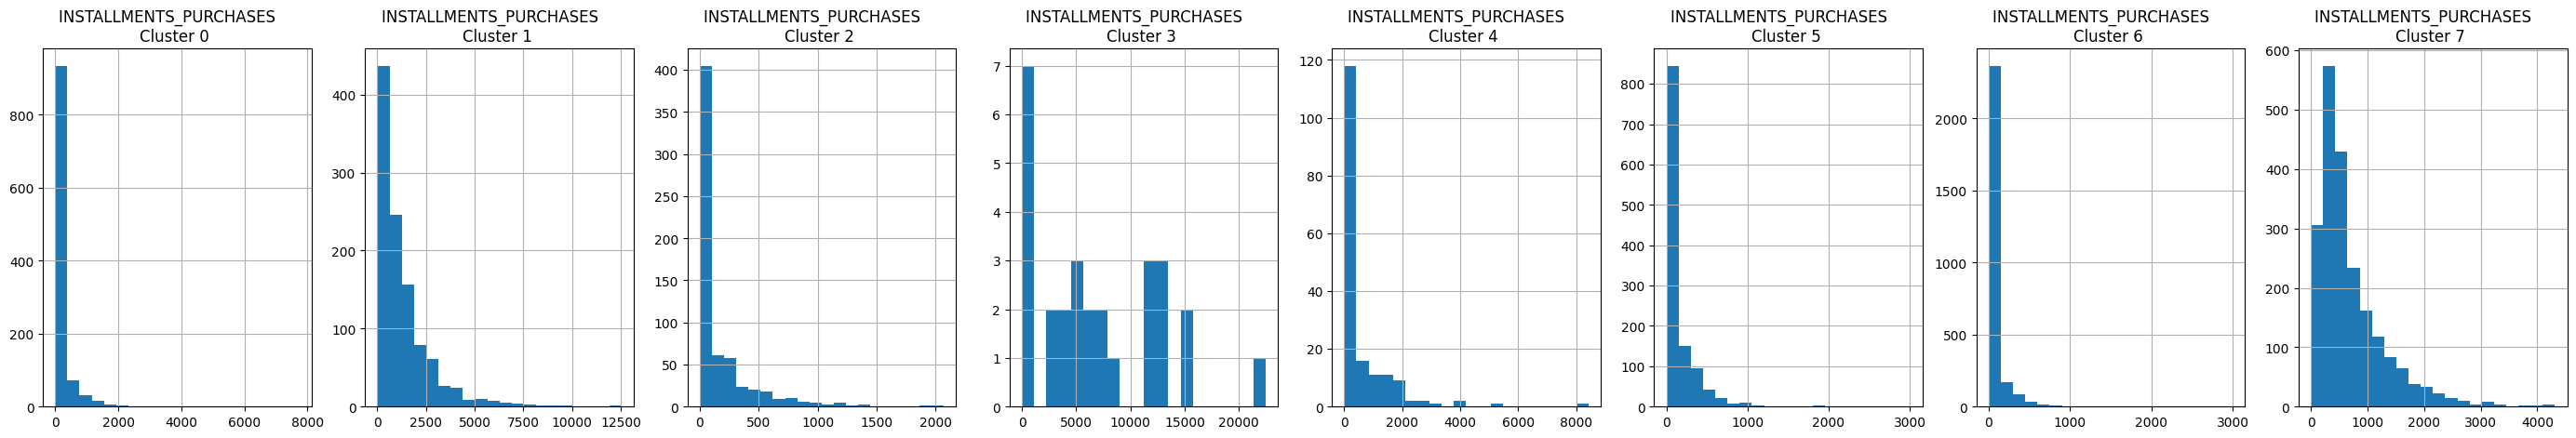

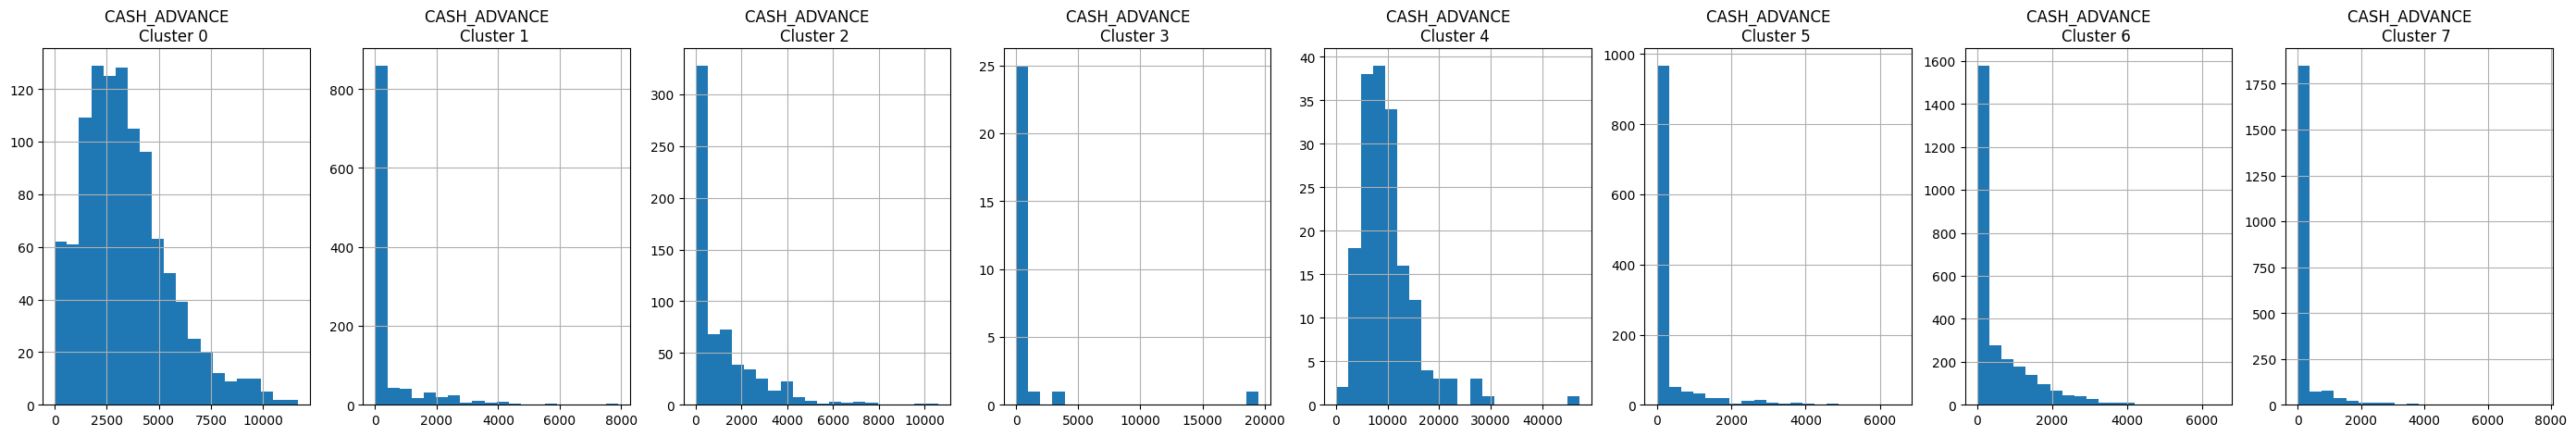

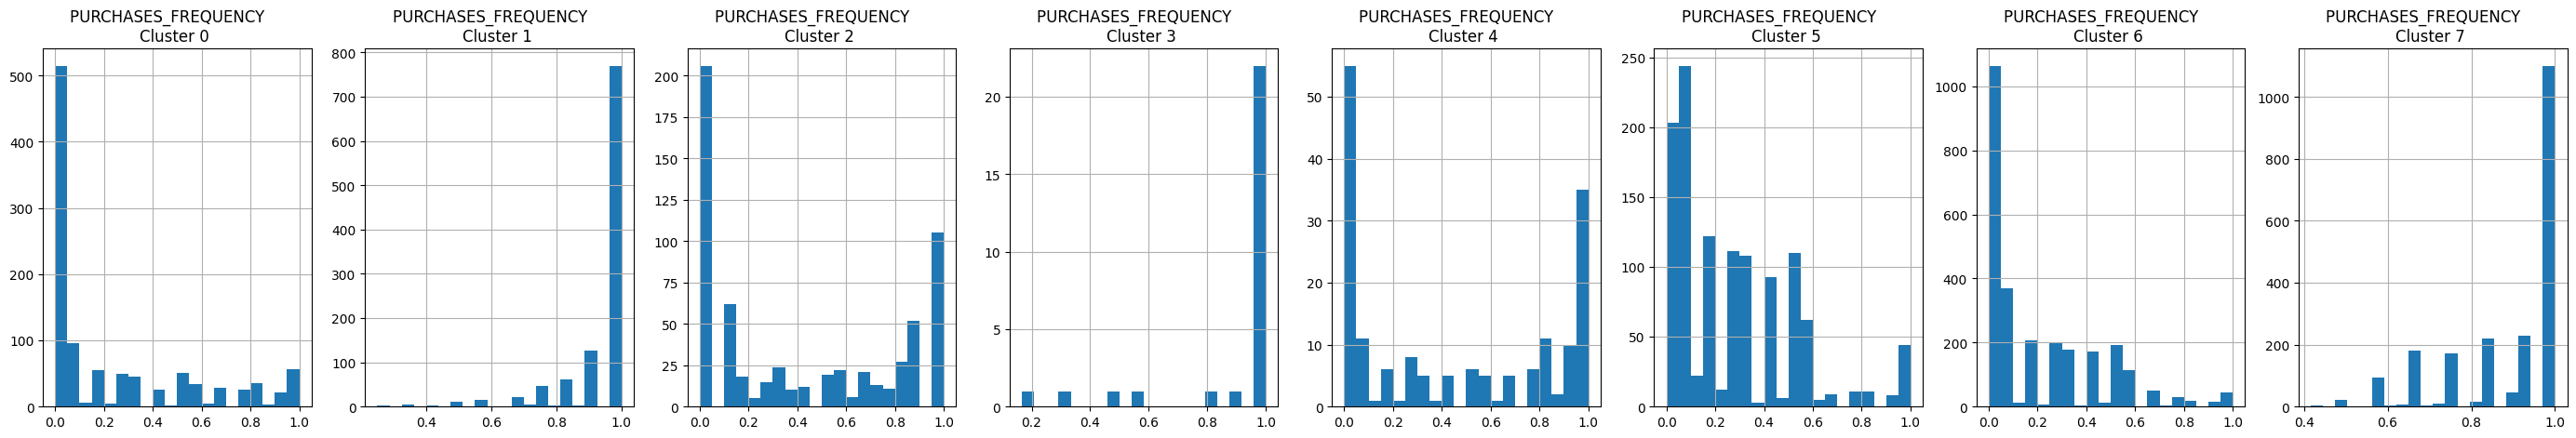

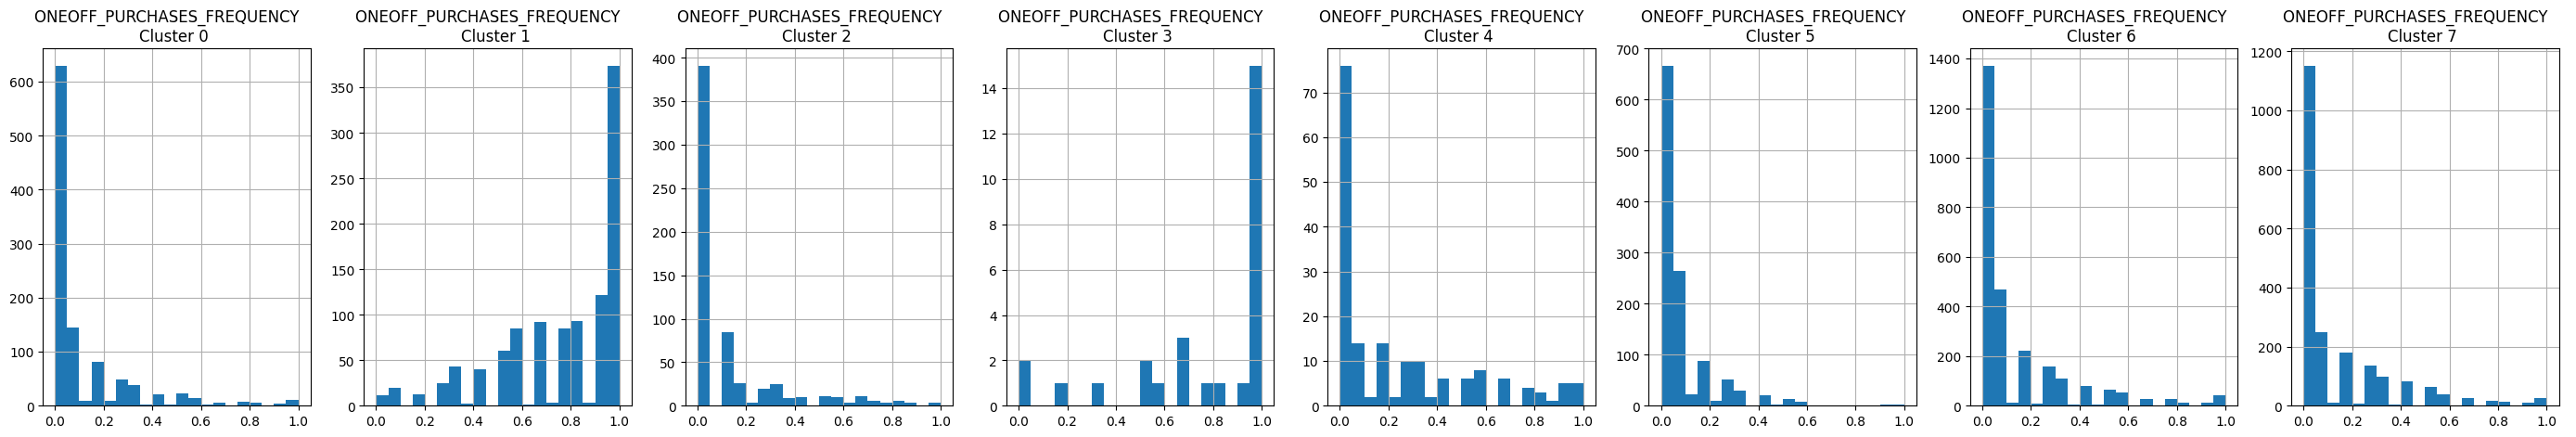

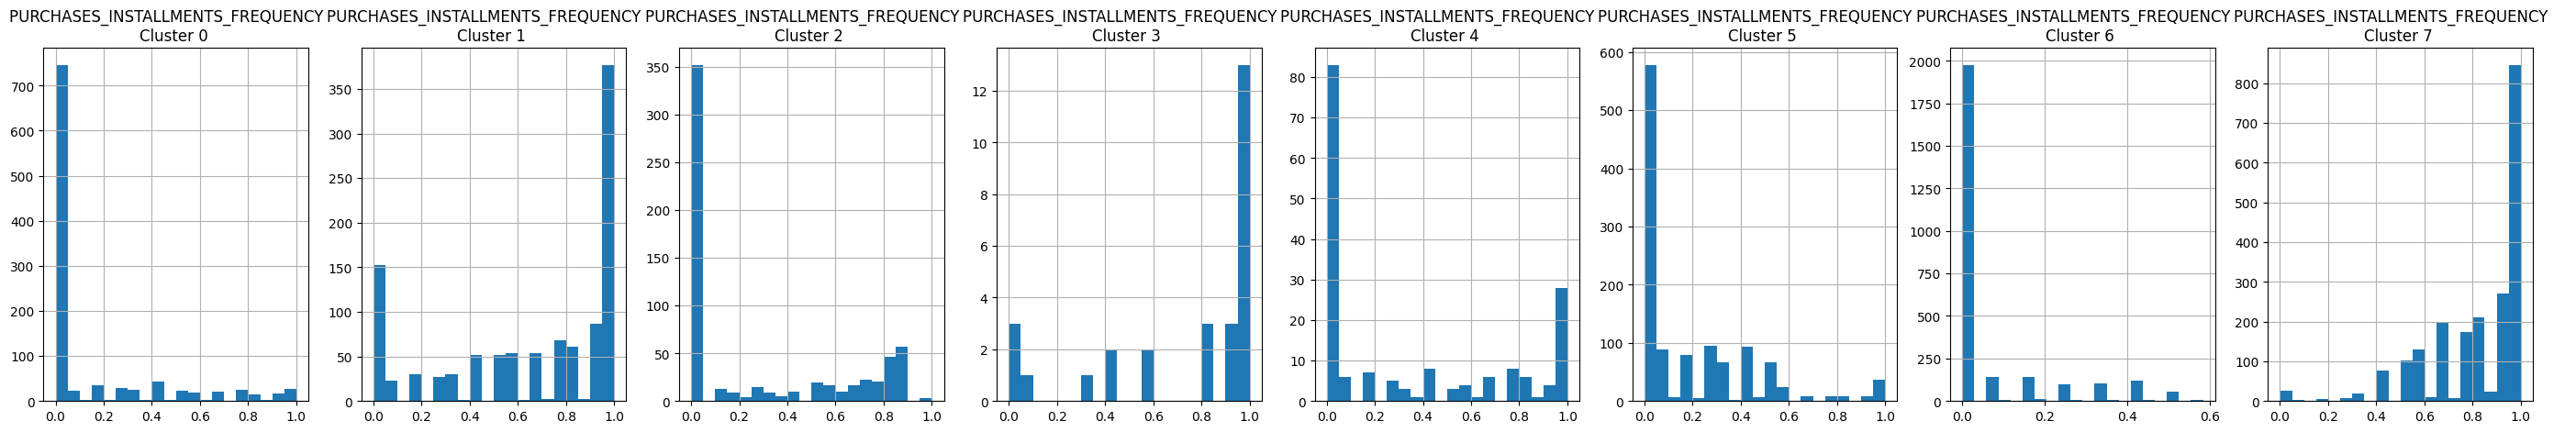

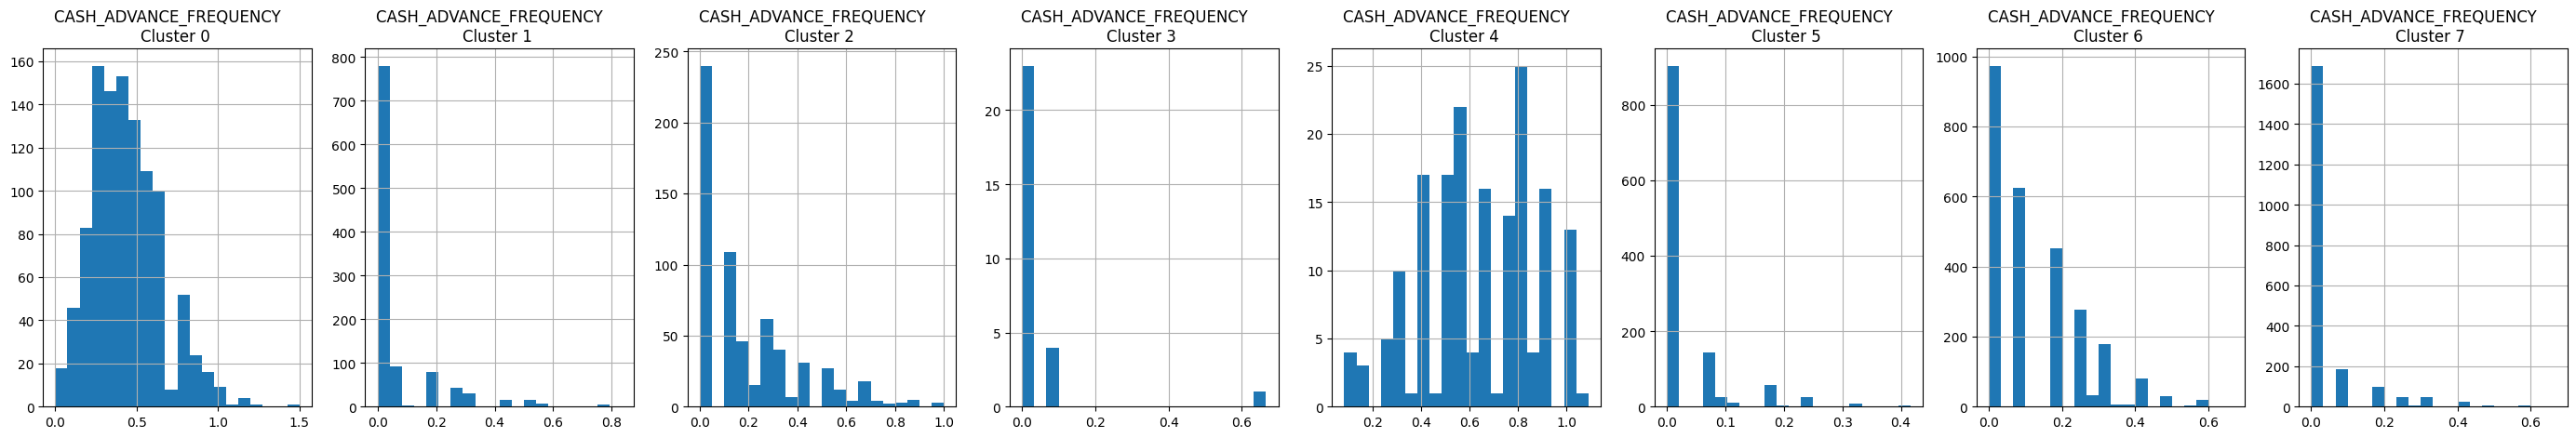

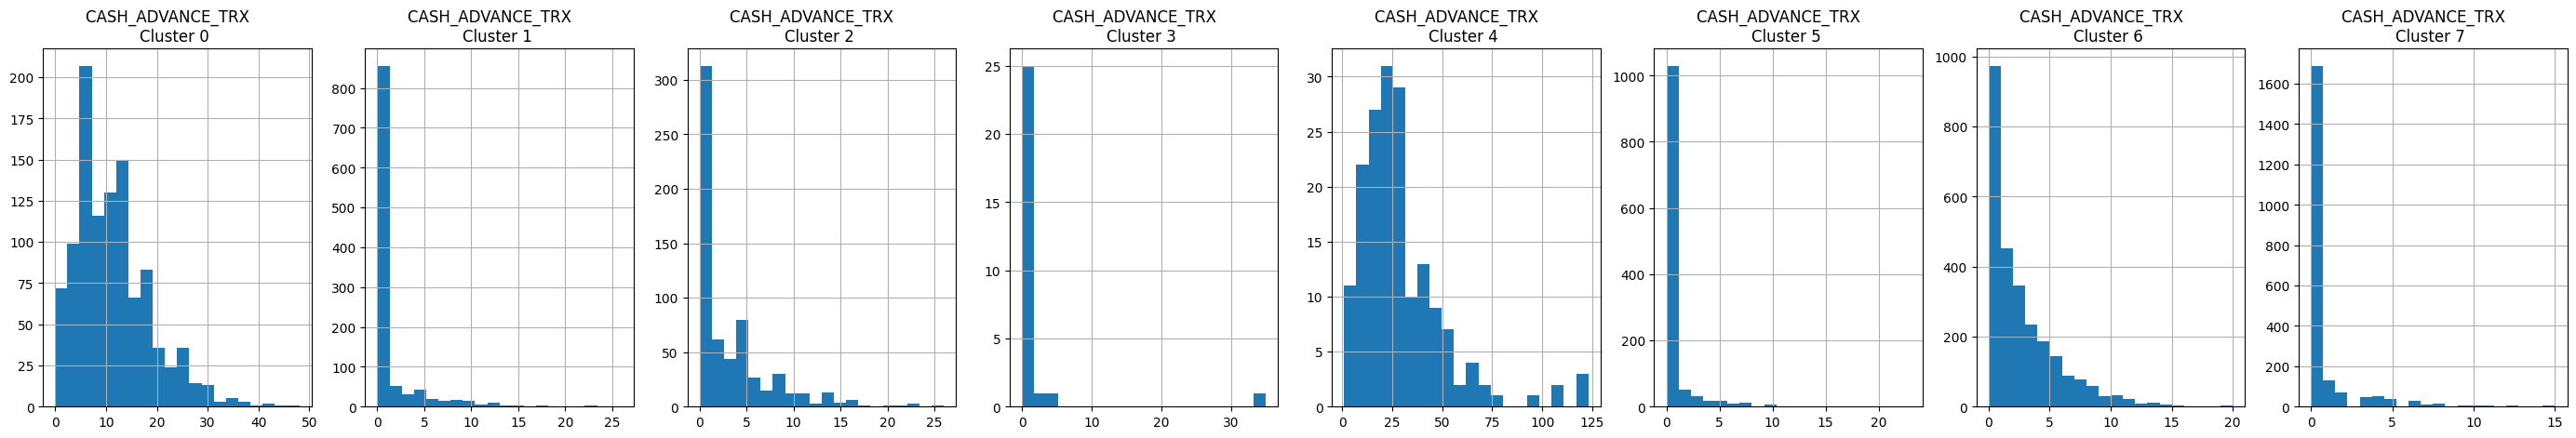

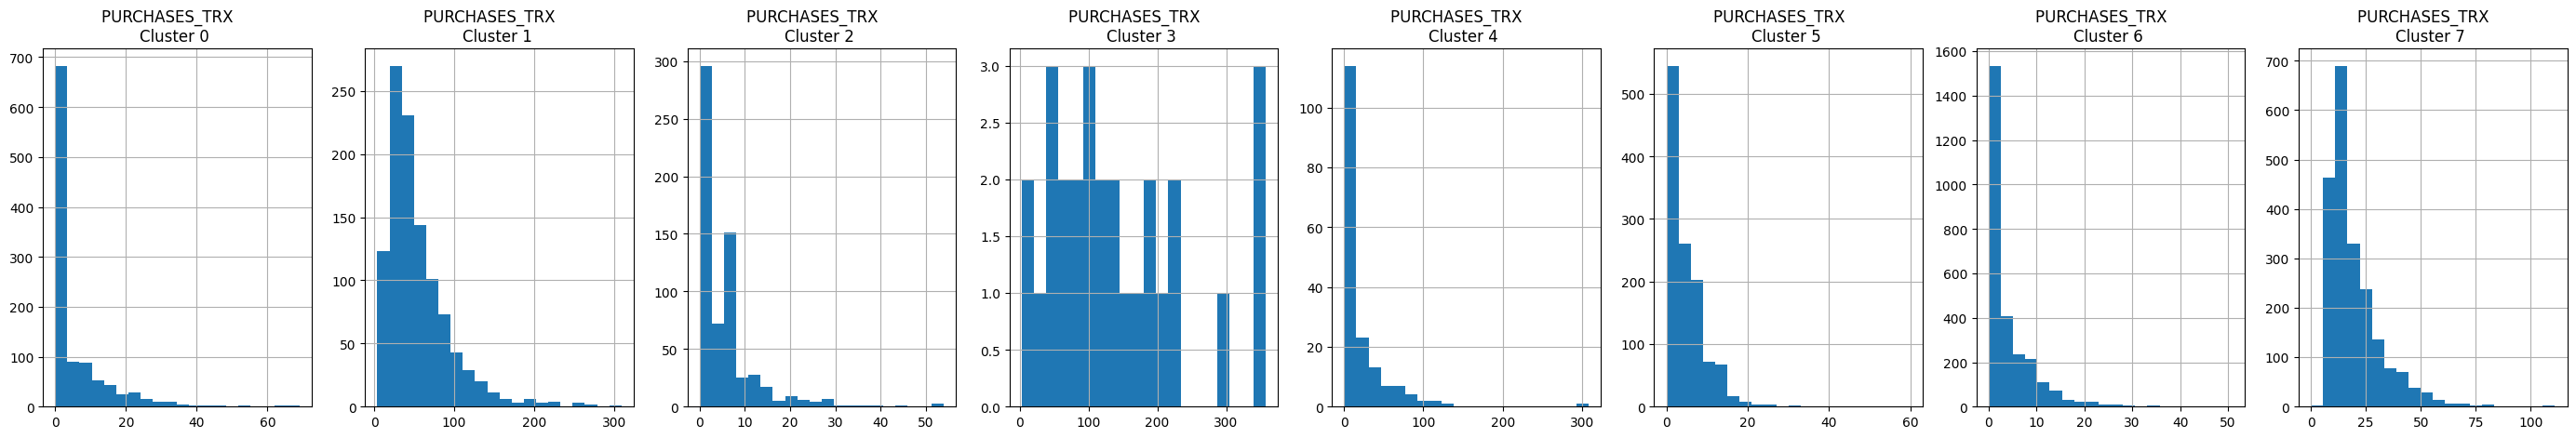

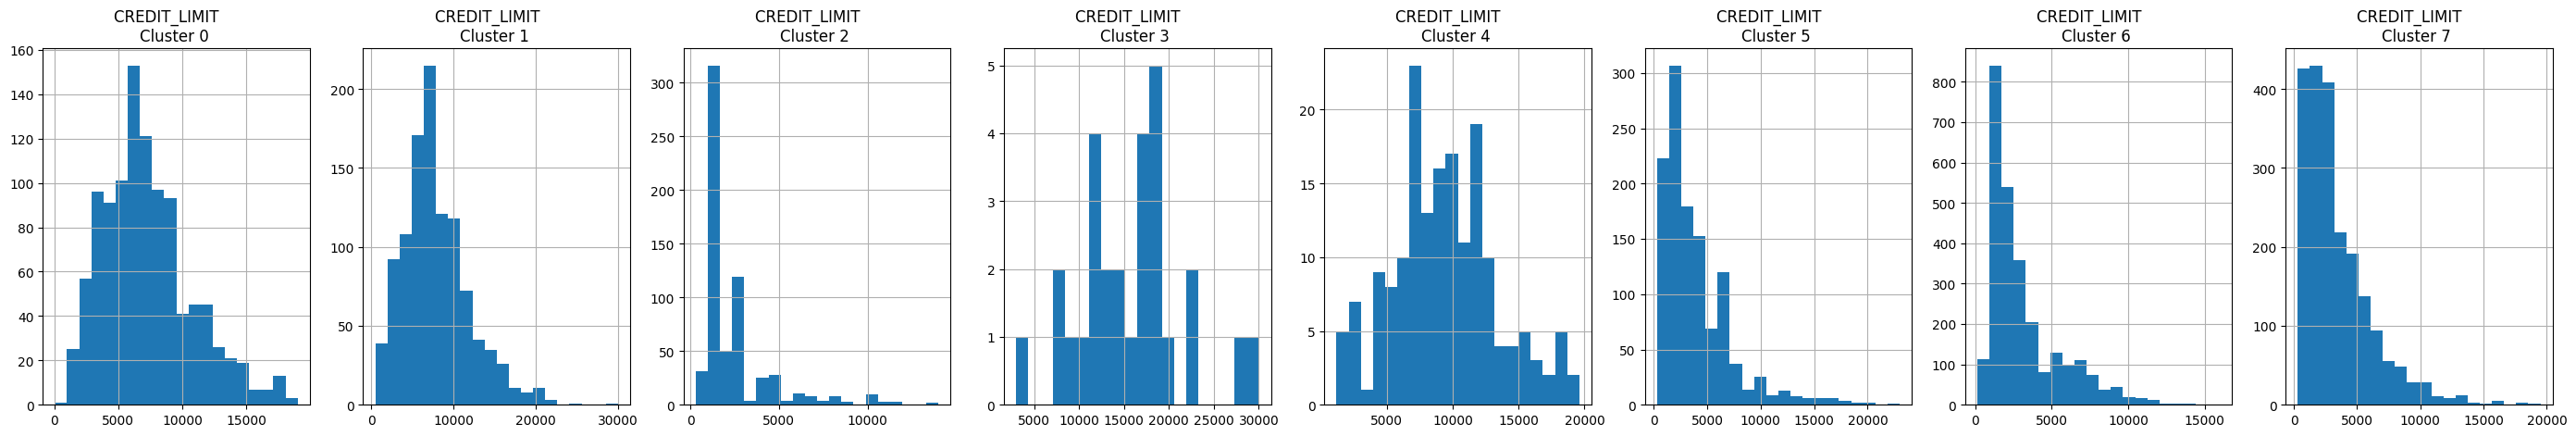

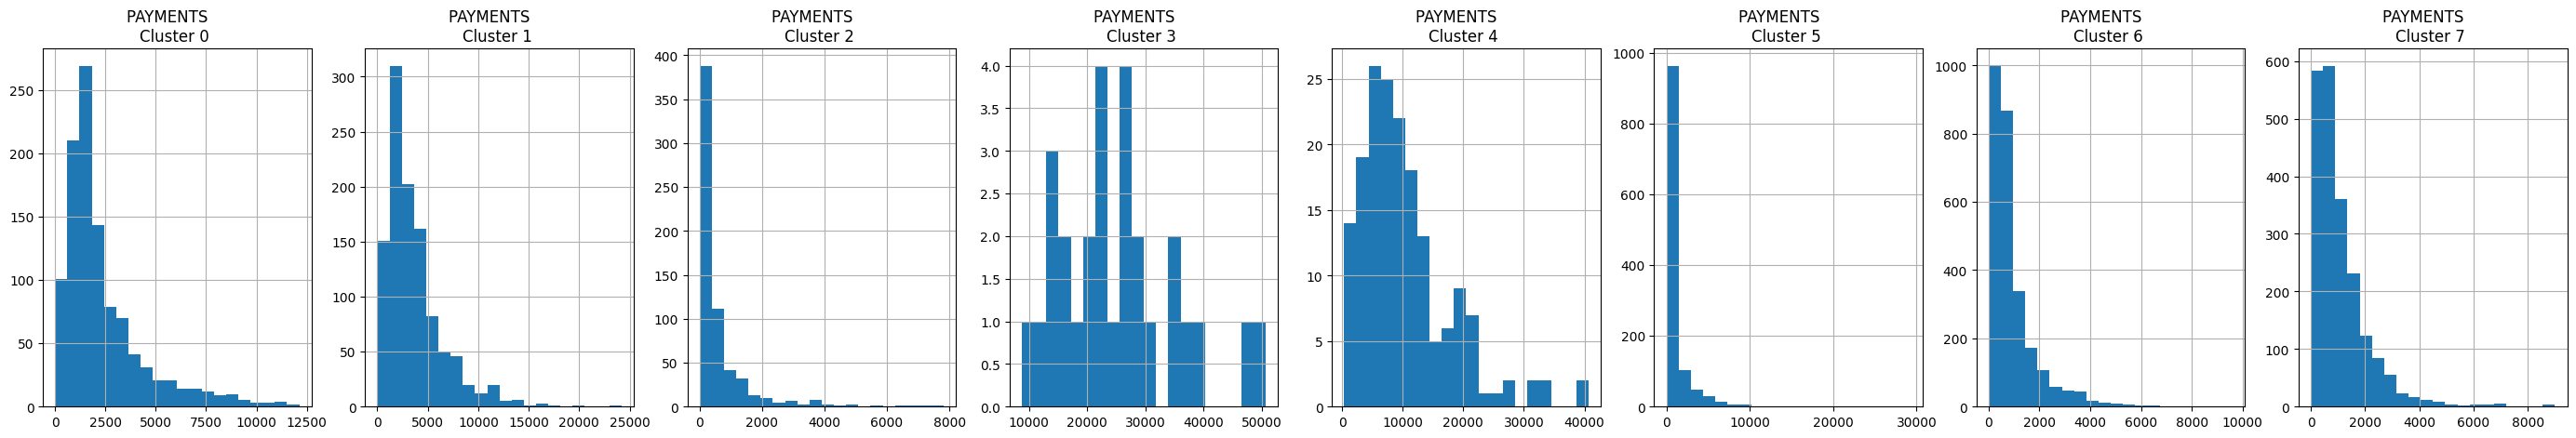

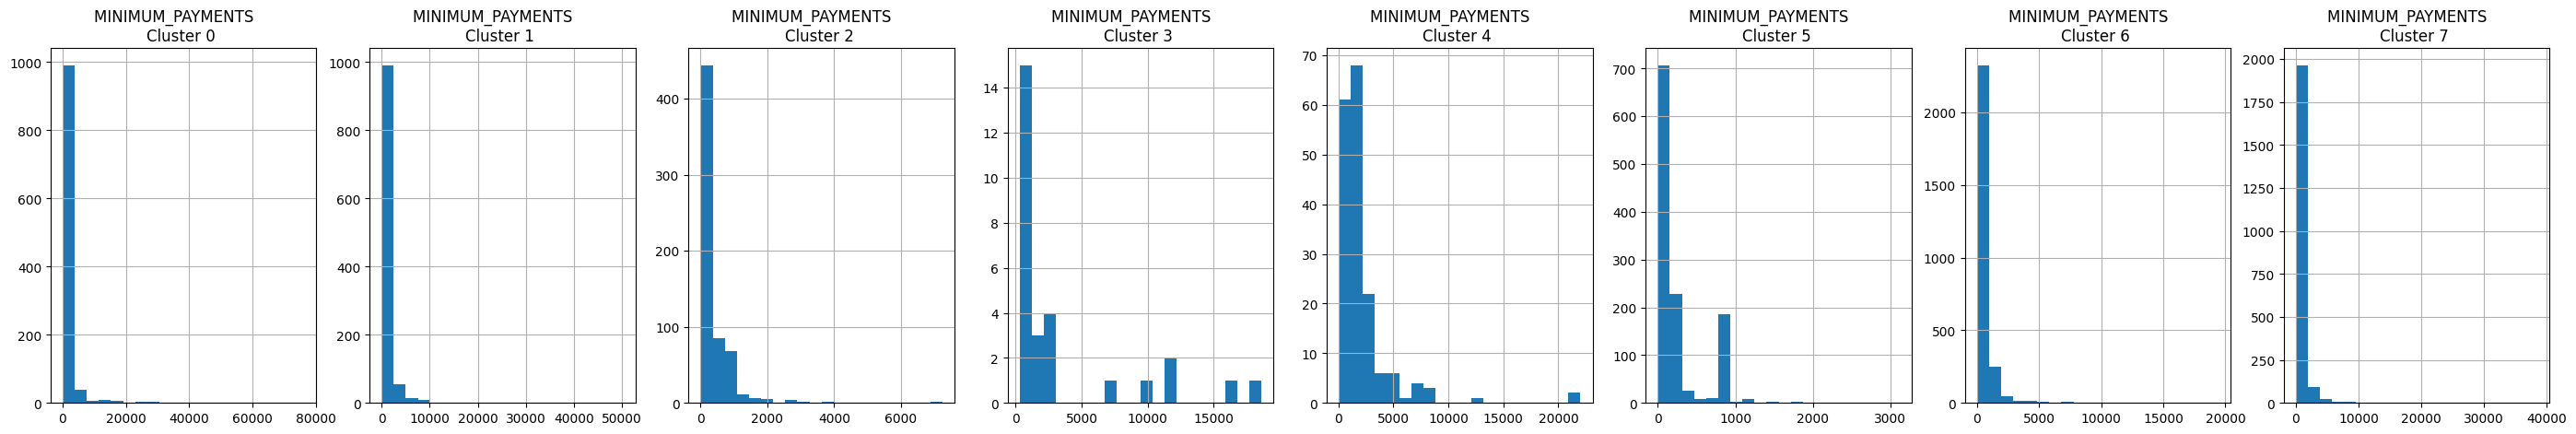

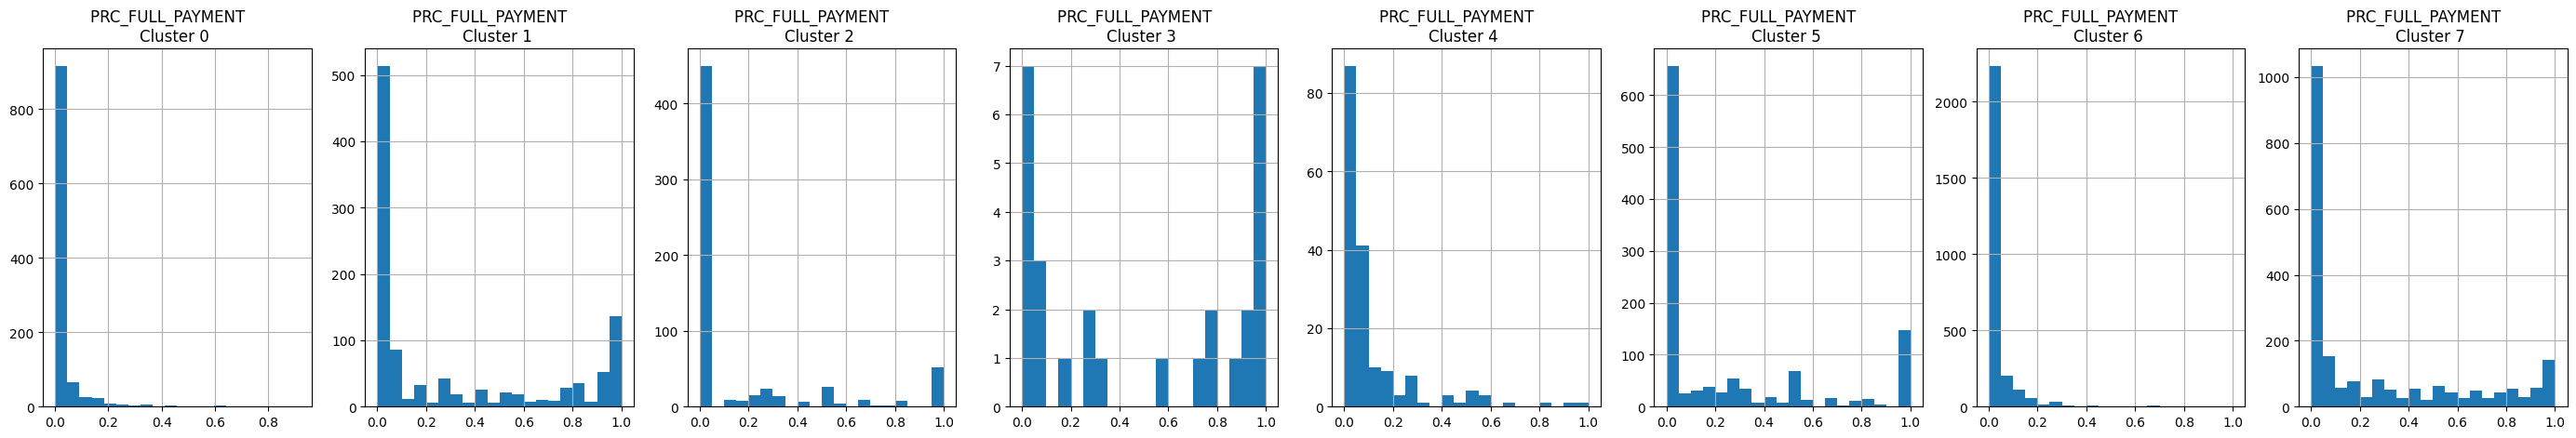

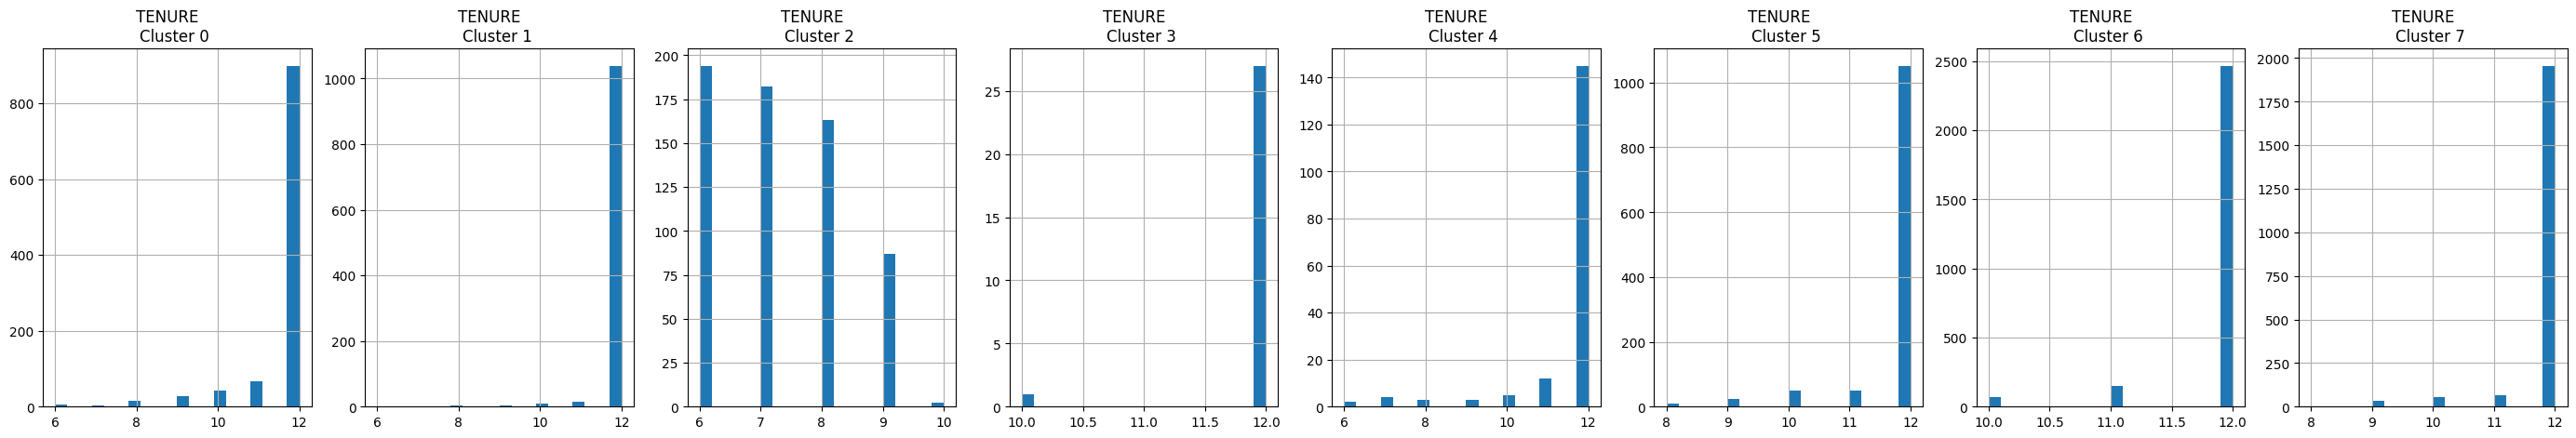

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()



# PCA

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222026, -1.07645061],
       [-1.1382949 ,  2.50647666],
       [ 0.96968401, -0.3835203 ],
       ...,
       [-0.92620364, -1.8107856 ],
       [-2.33655167, -0.65796601],
       [-0.55642216, -0.40046712]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138295,2.506477
2,0.969684,-0.383520
3,-0.873628,0.043166
4,-1.599434,-0.688581


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,6
1,-1.138295,2.506477,0
2,0.969684,-0.383520,1
3,-0.873628,0.043166,6
4,-1.599434,-0.688581,6


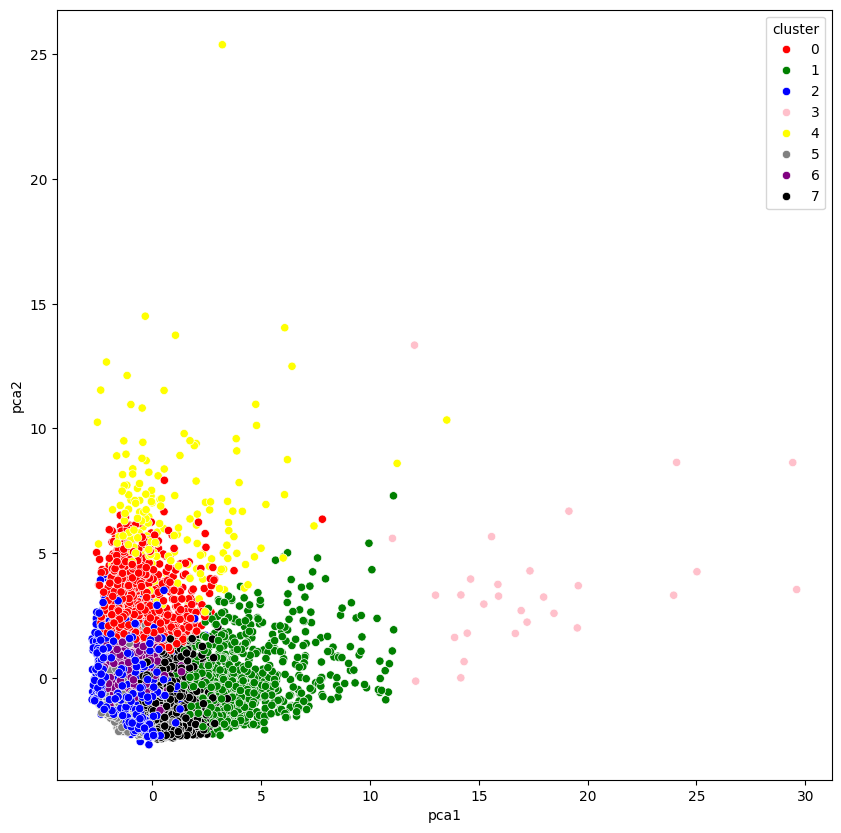

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# AUTOENCODERS

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.6624
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.3321
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.2652
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.2203
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1890
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.1652
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1401
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.1393
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.1266
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.1217
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.1009
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1006
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.1006
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0965
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0998
Epoc

In [ ]:
autoencoder.save_weights('autoencoder.weights.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
pred.shape

(8950, 10)

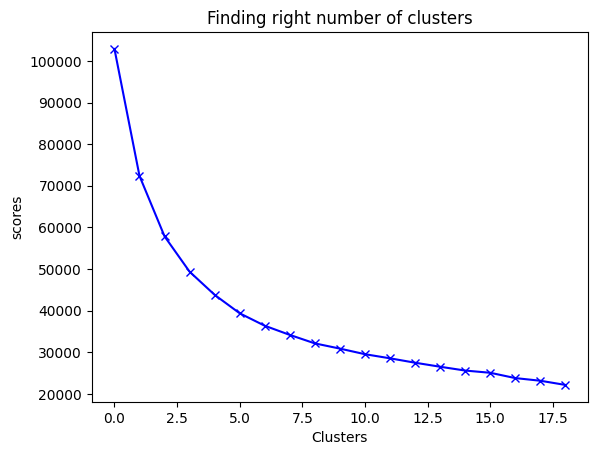

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

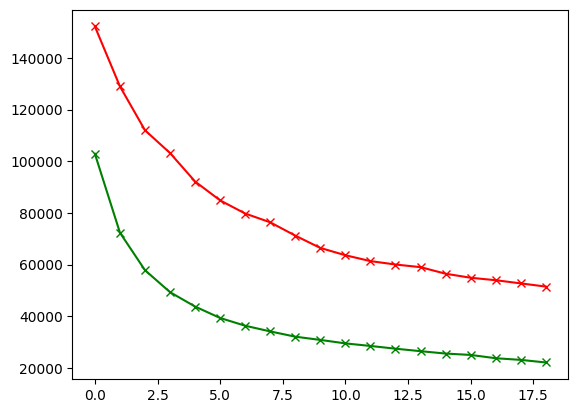

In [ ]:
plt.plot(scores_1, 'rx-')
plt.plot(scores_2, 'gx-')

In [ ]:
means = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.621451,-0.011018
1,1.289340,1.849917
2,-1.300391,-0.475519
3,-1.035524,0.134010
4,-2.364201,-0.141060


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.621451,-0.011018,2
1,1.289340,1.849917,7
2,-1.300391,-0.475519,2
3,-1.035524,0.134010,1
4,-2.364201,-0.141060,2


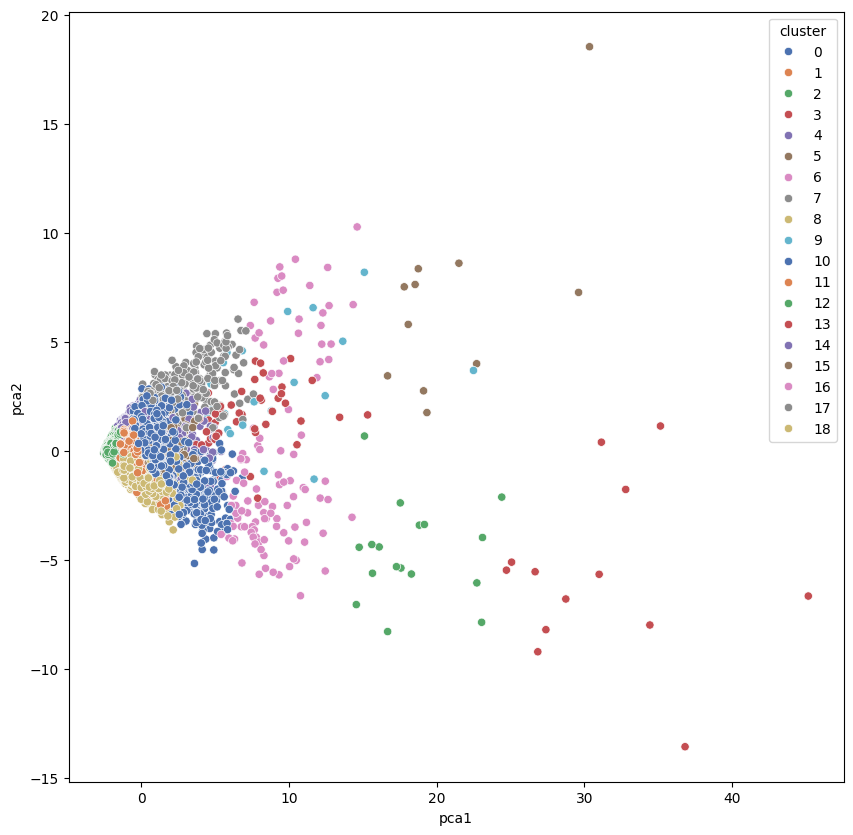

In [65]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=pca_df, palette="deep")
plt.show()